In [3]:
#import packages
import math
from nltk import sent_tokenize, word_tokenize, PorterStemmer
from nltk.corpus import stopwords   
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [4]:
#text
example_text1="""ربما كانت أحد أهم التطورات التي قامت بها الرياضيات العربية التي بدأت في هذا الوقت بعمل الخوارزمي و هي بدايات الجبر، و من المهم فهم كيف كانت هذه الفكرة الجديدة مهمة، فقد كانت خطوة ثورية بعيدا عن المفهوم اليوناني للرياضيات التي هي في جوهرها هندسة، الجبر كان نظرية موحدة تتيح الأعداد الكسرية و الأعداد اللا كسرية، و قدم وسيلة للتنمية في هذا الموضوع مستقبلا. و جانب آخر مهم لإدخال أفكار الجبر و هو أنه سمح بتطبيق الرياضيات على نفسها بطريقة لم تحدث من قبل"""
text1 = """Perhaps one of the most significant advances made by Arabic mathematics began at this time with the work of al-Khwarizmi, namely 
the beginnings of algebra. It is important to understand just how significant this new idea was. It was a revolutionary move away from 
the Greek concept of mathematics which was essentially geometry. Algebra was a unifying theory which allowed rational 
numbers, irrational numbers, geometrical magnitudes, etc., to all be treated as "algebraic objects". It gave mathematics a whole new 
development path so much broader in concept to that which had existed before, and provided a vehicle for future development of the 
subject. Another important aspect of the introduction of algebraic ideas was that it allowed mathematics to be applied to itself in a 
way which had not happened before.
"""

In [5]:
# 1 Sentence Tokenize
sentences = sent_tokenize(text1)
total_documents = len(sentences)
print(sentences)

['Perhaps one of the most significant advances made by Arabic mathematics began at this time with the work of al-Khwarizmi, namely \nthe beginnings of algebra.', 'It is important to understand just how significant this new idea was.', 'It was a revolutionary move away from \nthe Greek concept of mathematics which was essentially geometry.', 'Algebra was a unifying theory which allowed rational \nnumbers, irrational numbers, geometrical magnitudes, etc., to all be treated as "algebraic objects".', 'It gave mathematics a whole new \ndevelopment path so much broader in concept to that which had existed before, and provided a vehicle for future development of the \nsubject.', 'Another important aspect of the introduction of algebraic ideas was that it allowed mathematics to be applied to itself in a \nway which had not happened before.']


In [6]:
# 2 Create the Frequency matrix of the words in each sentence
def create_frequency_matrix(sentences):
    frequency_matrix = {}
    stopWords = set(stopwords.words("english"))
    ps = PorterStemmer()

    for sent in sentences:
        freq_table = {}
        words = word_tokenize(sent)
        for word in words:
            word = word.lower()
            
            if word in stopWords:
                continue

            if word in freq_table:
                freq_table[word] += 1
            else:
                freq_table[word] = 1

        frequency_matrix[sent[:15]] = freq_table

    return frequency_matrix

freq_matrix = create_frequency_matrix(sentences)
print(freq_matrix)

{'Perhaps one of ': {'perhaps': 1, 'one': 1, 'significant': 1, 'advances': 1, 'made': 1, 'arabic': 1, 'mathematics': 1, 'began': 1, 'time': 1, 'work': 1, 'al-khwarizmi': 1, ',': 1, 'namely': 1, 'beginnings': 1, 'algebra': 1, '.': 1}, 'It is important': {'important': 1, 'understand': 1, 'significant': 1, 'new': 1, 'idea': 1, '.': 1}, 'It was a revolu': {'revolutionary': 1, 'move': 1, 'away': 1, 'greek': 1, 'concept': 1, 'mathematics': 1, 'essentially': 1, 'geometry': 1, '.': 1}, 'Algebra was a u': {'algebra': 1, 'unifying': 1, 'theory': 1, 'allowed': 1, 'rational': 1, 'numbers': 2, ',': 4, 'irrational': 1, 'geometrical': 1, 'magnitudes': 1, 'etc.': 1, 'treated': 1, '``': 1, 'algebraic': 1, 'objects': 1, "''": 1, '.': 1}, 'It gave mathema': {'gave': 1, 'mathematics': 1, 'whole': 1, 'new': 1, 'development': 2, 'path': 1, 'much': 1, 'broader': 1, 'concept': 1, 'existed': 1, ',': 1, 'provided': 1, 'vehicle': 1, 'future': 1, 'subject': 1, '.': 1}, 'Another importa': {'another': 1, 'important

In [7]:
# 3 Calculate TF
def create_tf_matrix(freq_matrix):
    tf_matrix = {}

    for sent, f_table in freq_matrix.items():
        tf_table = {}

        count_words_in_sentence = len(f_table)
        for word, count in f_table.items():
            tf_table[word] = count / count_words_in_sentence

        tf_matrix[sent] = tf_table

    return tf_matrix
tf_matrix = create_tf_matrix(freq_matrix)
print(tf_matrix)

{'Perhaps one of ': {'perhaps': 0.0625, 'one': 0.0625, 'significant': 0.0625, 'advances': 0.0625, 'made': 0.0625, 'arabic': 0.0625, 'mathematics': 0.0625, 'began': 0.0625, 'time': 0.0625, 'work': 0.0625, 'al-khwarizmi': 0.0625, ',': 0.0625, 'namely': 0.0625, 'beginnings': 0.0625, 'algebra': 0.0625, '.': 0.0625}, 'It is important': {'important': 0.16666666666666666, 'understand': 0.16666666666666666, 'significant': 0.16666666666666666, 'new': 0.16666666666666666, 'idea': 0.16666666666666666, '.': 0.16666666666666666}, 'It was a revolu': {'revolutionary': 0.1111111111111111, 'move': 0.1111111111111111, 'away': 0.1111111111111111, 'greek': 0.1111111111111111, 'concept': 0.1111111111111111, 'mathematics': 0.1111111111111111, 'essentially': 0.1111111111111111, 'geometry': 0.1111111111111111, '.': 0.1111111111111111}, 'Algebra was a u': {'algebra': 0.058823529411764705, 'unifying': 0.058823529411764705, 'theory': 0.058823529411764705, 'allowed': 0.058823529411764705, 'rational': 0.0588235294

In [8]:
# 4 creating table for documents per words
def create_documents_per_words(freq_matrix):
    word_per_doc_table = {}

    for sent, f_table in freq_matrix.items():
        for word, count in f_table.items():
            if word in word_per_doc_table:
                word_per_doc_table[word] += 1
            else:
                word_per_doc_table[word] = 1

    return word_per_doc_table
count_doc_per_words = create_documents_per_words(freq_matrix)
print(count_doc_per_words)

{'perhaps': 1, 'one': 1, 'significant': 2, 'advances': 1, 'made': 1, 'arabic': 1, 'mathematics': 4, 'began': 1, 'time': 1, 'work': 1, 'al-khwarizmi': 1, ',': 3, 'namely': 1, 'beginnings': 1, 'algebra': 2, '.': 6, 'important': 2, 'understand': 1, 'new': 2, 'idea': 1, 'revolutionary': 1, 'move': 1, 'away': 1, 'greek': 1, 'concept': 2, 'essentially': 1, 'geometry': 1, 'unifying': 1, 'theory': 1, 'allowed': 2, 'rational': 1, 'numbers': 1, 'irrational': 1, 'geometrical': 1, 'magnitudes': 1, 'etc.': 1, 'treated': 1, '``': 1, 'algebraic': 2, 'objects': 1, "''": 1, 'gave': 1, 'whole': 1, 'development': 1, 'path': 1, 'much': 1, 'broader': 1, 'existed': 1, 'provided': 1, 'vehicle': 1, 'future': 1, 'subject': 1, 'another': 1, 'aspect': 1, 'introduction': 1, 'ideas': 1, 'applied': 1, 'way': 1, 'happened': 1}


In [9]:
# 5 Calculate IDF
def create_idf_matrix(freq_matrix, count_doc_per_words, total_documents):
    idf_matrix = {}

    for sent, f_table in freq_matrix.items():
        idf_table = {}

        for word in f_table.keys():
            idf_table[word] = math.log10(total_documents / float(count_doc_per_words[word]))

        idf_matrix[sent] = idf_table

    return idf_matrix
idf_matrix = create_idf_matrix(freq_matrix, count_doc_per_words, total_documents)
print(idf_matrix)

{'Perhaps one of ': {'perhaps': 0.7781512503836436, 'one': 0.7781512503836436, 'significant': 0.47712125471966244, 'advances': 0.7781512503836436, 'made': 0.7781512503836436, 'arabic': 0.7781512503836436, 'mathematics': 0.17609125905568124, 'began': 0.7781512503836436, 'time': 0.7781512503836436, 'work': 0.7781512503836436, 'al-khwarizmi': 0.7781512503836436, ',': 0.3010299956639812, 'namely': 0.7781512503836436, 'beginnings': 0.7781512503836436, 'algebra': 0.47712125471966244, '.': 0.0}, 'It is important': {'important': 0.47712125471966244, 'understand': 0.7781512503836436, 'significant': 0.47712125471966244, 'new': 0.47712125471966244, 'idea': 0.7781512503836436, '.': 0.0}, 'It was a revolu': {'revolutionary': 0.7781512503836436, 'move': 0.7781512503836436, 'away': 0.7781512503836436, 'greek': 0.7781512503836436, 'concept': 0.47712125471966244, 'mathematics': 0.17609125905568124, 'essentially': 0.7781512503836436, 'geometry': 0.7781512503836436, '.': 0.0}, 'Algebra was a u': {'algebr

In [10]:
# 6 Calculate TF-IDF 
def create_tf_idf_matrix(tf_matrix, idf_matrix):
    tf_idf_matrix = {}

    for (sent1, f_table1), (sent2, f_table2) in zip(tf_matrix.items(), idf_matrix.items()):

        tf_idf_table = {}

        for (word1, value1), (word2, value2) in zip(f_table1.items(),
                                                    f_table2.items()):  
            tf_idf_table[word1] = float(value1 * value2)

        tf_idf_matrix[sent1] = tf_idf_table

    return tf_idf_matrix
tf_idf_matrix = create_tf_idf_matrix(tf_matrix, idf_matrix)
print(tf_idf_matrix)

{'Perhaps one of ': {'perhaps': 0.04863445314897773, 'one': 0.04863445314897773, 'significant': 0.029820078419978902, 'advances': 0.04863445314897773, 'made': 0.04863445314897773, 'arabic': 0.04863445314897773, 'mathematics': 0.011005703690980077, 'began': 0.04863445314897773, 'time': 0.04863445314897773, 'work': 0.04863445314897773, 'al-khwarizmi': 0.04863445314897773, ',': 0.018814374728998825, 'namely': 0.04863445314897773, 'beginnings': 0.04863445314897773, 'algebra': 0.029820078419978902, '.': 0.0}, 'It is important': {'important': 0.07952020911994373, 'understand': 0.1296918750639406, 'significant': 0.07952020911994373, 'new': 0.07952020911994373, 'idea': 0.1296918750639406, '.': 0.0}, 'It was a revolu': {'revolutionary': 0.08646125004262707, 'move': 0.08646125004262707, 'away': 0.08646125004262707, 'greek': 0.08646125004262707, 'concept': 0.05301347274662915, 'mathematics': 0.01956569545063125, 'essentially': 0.08646125004262707, 'geometry': 0.08646125004262707, '.': 0.0}, 'Alge

In [11]:
corpus = ['Perhaps one of the most significant advances made by Arabic mathematics began at this time with the work of al-Khwarizmi, namely the beginnings of algebra.', 
          'It is important to understand just how significant this new idea was.', 
          'It was a revolutionary move away from the Greek concept of mathematics which was essentially geometry.',
          'Algebra was a unifying theory which allowed rational numbers, irrational numbers, geometrical magnitudes, etc., to all be treated as "algebraic objects".',
          'It gave mathematics a whole new development path so much broader in concept to that which had existed before, and provided a vehicle for future development of the subject.',
          'Another important aspect of the introduction of algebraic ideas was that it allowed mathematics to be applied to itself in a way which had not happened before.'
          ]

In [12]:
#remove stop words from the corpus

def remove_stop_words(corpus):
    stop_words = set(stopwords.words("english"))
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    
    return results

In [13]:
corpus = remove_stop_words(corpus)

In [14]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)

words = set(words)

In [18]:

words

{'"algebraic',
 'Algebra',
 'Another',
 'Arabic',
 'Greek',
 'It',
 'Perhaps',
 'a',
 'advances',
 'al-Khwarizmi,',
 'algebra.',
 'algebraic',
 'allowed',
 'applied',
 'aspect',
 'away',
 'before,',
 'before.',
 'began',
 'beginnings',
 'broader',
 'concept',
 'development',
 'essentially',
 'etc.,',
 'existed',
 'future',
 'gave',
 'geometrical',
 'geometry.',
 'happened',
 'idea',
 'ideas',
 'important',
 'introduction',
 'irrational',
 'made',
 'magnitudes,',
 'mathematics',
 'move',
 'much',
 'namely',
 'new',
 'numbers,',
 'objects".',
 'of',
 'one',
 'path',
 'provided',
 'rational',
 'revolutionary',
 'significant',
 'subject.',
 'the',
 'theory',
 'time',
 'to',
 'treated',
 'understand',
 'unifying',
 'vehicle',
 'was',
 'was.',
 'way',
 'whole',
 'work'}

In [19]:
#data generation 
#we will generate label for each word using skip gram
word2int = {}

for i,word in enumerate(words):
    word2int[word] = i

sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
    
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])

In [20]:
import pandas as pd
for text in corpus:
    print(text)

df = pd.DataFrame(data, columns = ['input', 'label'])

Perhaps one significant advances made Arabic mathematics began time the work of al-Khwarizmi, namely the beginnings of algebra.
It important understand significant new idea was.
It revolutionary move away Greek concept mathematics was essentially geometry.
Algebra unifying theory allowed rational numbers, irrational numbers, geometrical magnitudes, etc., treated "algebraic objects".
It gave mathematics whole new development path much broader concept existed before, provided a vehicle future development subject.
Another important aspect introduction of algebraic ideas allowed mathematics applied to way happened before.


In [21]:
df.head(10)

,input,label
0,Perhaps,one
1,Perhaps,significant
2,one,Perhaps
3,one,significant
4,one,advances
5,significant,Perhaps
6,significant,one
7,significant,advances
8,significant,made
9,advances,one


In [22]:
df.shape

(286, 2)

In [23]:

word2int

{'Perhaps': 0,
 'vehicle': 1,
 'idea': 2,
 'whole': 3,
 'Greek': 4,
 'introduction': 5,
 'algebraic': 6,
 'was': 7,
 'Algebra': 8,
 'subject.': 9,
 'to': 10,
 'provided': 11,
 'rational': 12,
 'geometrical': 13,
 'namely': 14,
 'made': 15,
 'etc.,': 16,
 'the': 17,
 'work': 18,
 'advances': 19,
 'allowed': 20,
 'development': 21,
 'before,': 22,
 'revolutionary': 23,
 'treated': 24,
 'Arabic': 25,
 'al-Khwarizmi,': 26,
 'before.': 27,
 'of': 28,
 'geometry.': 29,
 'broader': 30,
 'numbers,': 31,
 'irrational': 32,
 'ideas': 33,
 'way': 34,
 'theory': 35,
 'understand': 36,
 'magnitudes,': 37,
 'gave': 38,
 'applied': 39,
 'mathematics': 40,
 'Another': 41,
 'significant': 42,
 'It': 43,
 'much': 44,
 'existed': 45,
 'began': 46,
 'a': 47,
 'algebra.': 48,
 'new': 49,
 'unifying': 50,
 'objects".': 51,
 'happened': 52,
 'time': 53,
 'was.': 54,
 'important': 55,
 '"algebraic': 56,
 'one': 57,
 'beginnings': 58,
 'move': 59,
 'essentially': 60,
 'aspect': 61,
 'away': 62,
 'future': 63,


In [26]:
#Define Tensorflow Graph
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import numpy as np

ONE_HOT_DIM = len(words)

# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))

# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2 

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)
# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

Instructions for updating:
non-resource variables are not supported in the long term


In [27]:
#training
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration = 20000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 3000 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

iteration 0 loss is :  5.495717
iteration 3000 loss is :  3.756131
iteration 6000 loss is :  3.3701327
iteration 9000 loss is :  3.129861
iteration 12000 loss is :  3.016182
iteration 15000 loss is :  2.9539354
iteration 18000 loss is :  2.9123774


In [28]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)
print(vectors)

[[-1.5406795e-01 -1.9953938e+00]
 [-2.2004333e+00  2.4723275e+00]
 [-3.3510652e-01 -8.3361566e-02]
 [-2.5290364e-01 -5.6651235e-04]
 [-2.3257092e-01 -8.7792289e-01]
 [-2.8888223e-01 -2.3401000e+00]
 [ 4.8704988e-01 -1.4742670e+00]
 [-1.0282227e+00 -5.8085710e-01]
 [ 2.1235631e+00 -1.8557112e-01]
 [-1.3811061e+00  2.2802286e+00]
 [ 1.8892529e+00 -2.9729028e+00]
 [-2.4533632e+00  1.8281450e+00]
 [ 3.0906155e+00  2.9388028e-01]
 [ 2.2684419e+00  1.8419304e+00]
 [-3.1230514e+00 -2.4799700e+00]
 [-4.4152606e-01 -2.7036908e+00]
 [ 9.6990496e-01  2.2522497e+00]
 [-3.0533934e+00 -2.4214897e+00]
 [-2.8672585e+00 -2.3974378e+00]
 [-3.8549206e-01 -1.6697278e+00]
 [ 7.6881856e-01 -3.2215902e-01]
 [-8.1746566e-01  8.7194031e-01]
 [-3.9459436e+00  1.1619015e+00]
 [ 6.4496952e-01 -1.4873562e+00]
 [ 7.3119789e-01  2.0082095e+00]
 [-7.7216154e-01 -1.8864584e+00]
 [-2.9298518e+00 -2.4997692e+00]
 [ 1.9702673e+00 -2.1969297e+00]
 [-1.1185641e+00 -1.3271220e+00]
 [-1.0559671e+00 -1.7630979e-01]
 [-3.44608

In [29]:
#word vector in a table
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,Perhaps,-0.154068,-1.995394
1,vehicle,-2.200433,2.472327
2,idea,-0.335107,-0.083362
3,whole,-0.252904,-0.000567
4,Greek,-0.232571,-0.877923
...,...,...,...
61,aspect,-0.016730,-1.852484
62,away,-0.002155,-0.354128
63,future,-1.320145,2.221225
64,path,-1.834559,0.938823


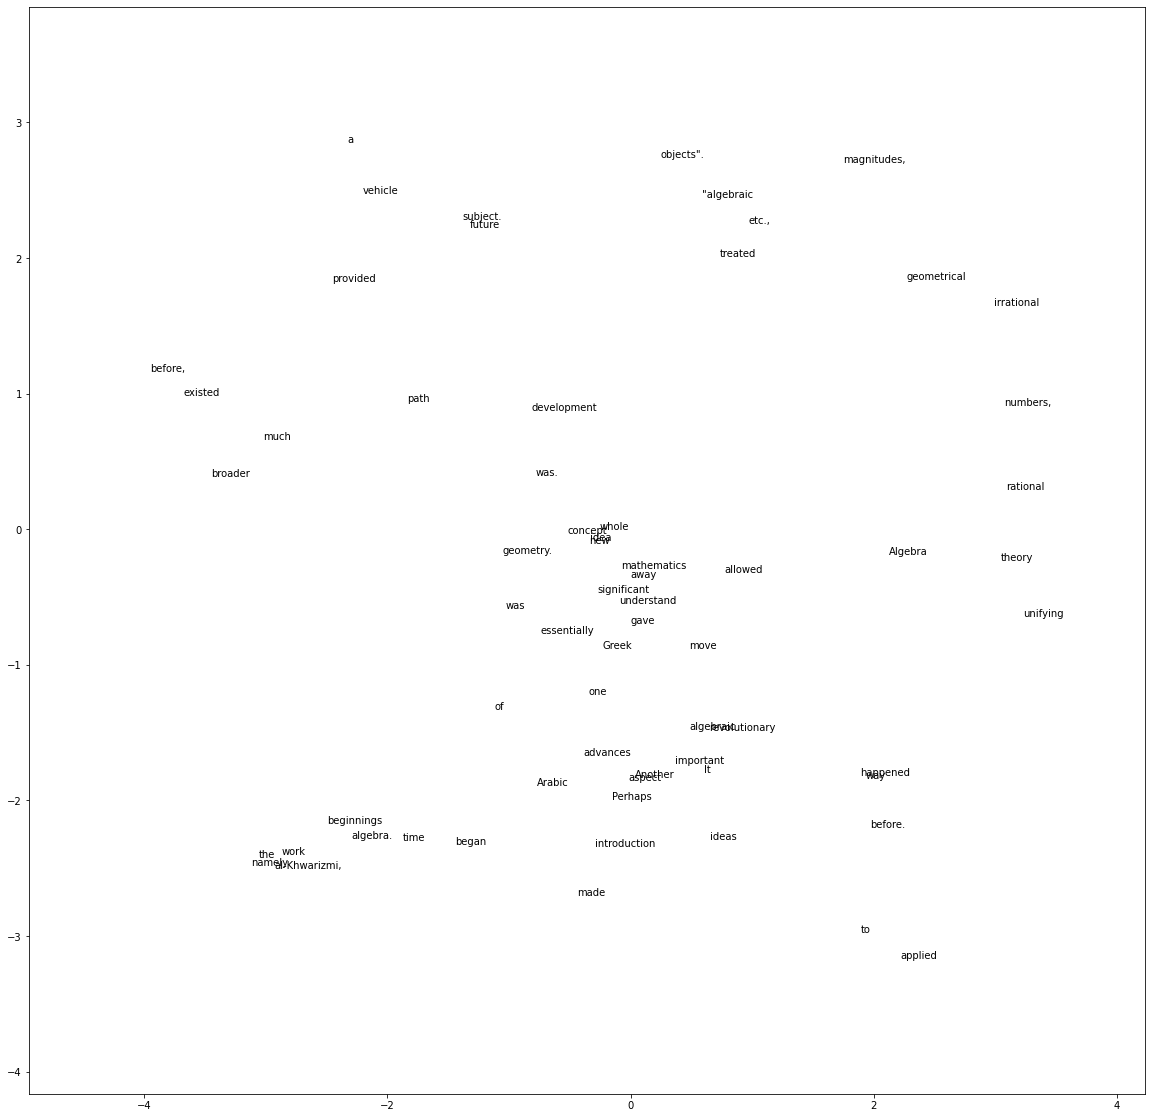

In [36]:
#plot word2vec in a 2dim chart
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (20,20)

plt.show()